In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [120]:
dataset=pd.read_csv(r"D:\\StudentsPerformance (1).csv")

In [121]:
dataset.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [123]:
dataset.shape

(1000, 8)

In [124]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [125]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [126]:
dataset.duplicated().sum()

0

In [127]:
dataset['parental level of education']=dataset['parental level of education'].replace("some high school","high school")

## Find the Outlier

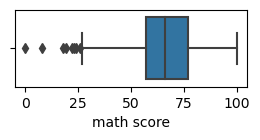

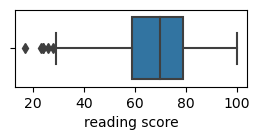

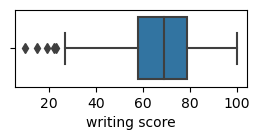

In [128]:
# math score
plt.figure(figsize=(3,1))
sns.boxplot(x="math score", data=dataset)
plt.show()

# reading score
plt.figure(figsize=(3,1))
sns.boxplot(x="reading score", data=dataset)
plt.show()

# writing score
plt.figure(figsize=(3,1))
sns.boxplot(x="writing score", data=dataset)
plt.show()

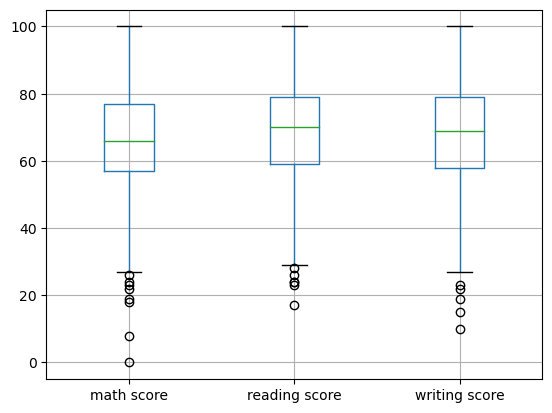

In [129]:
dataset.boxplot()
plt.savefig("outlier.png")

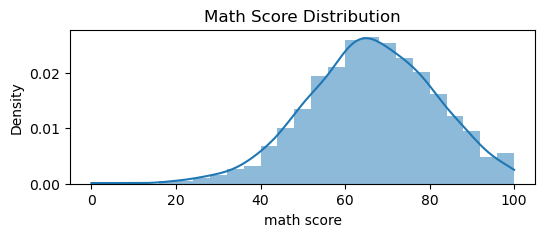

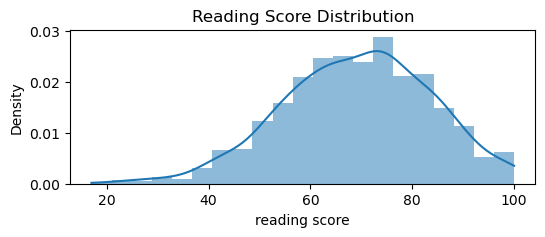

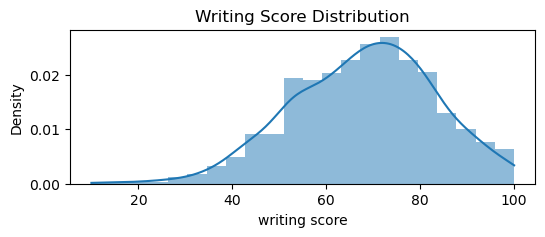

In [130]:
# math score
# plt.figure(figsize=(4,2))
plt.figure(figsize=(6,2))
sns.histplot(dataset["math score"], kde=True, stat="density", linewidth=0)
plt.title('Math Score Distribution')
# plt.savefig("Math Score Distribution.png")
plt.show()

# reading score
plt.figure(figsize=(6,2))
sns.histplot(dataset['reading score'], kde=True, stat="density", linewidth=0)
plt.title('Reading Score Distribution')
# plt.savefig("Reading Score Distribution.png")
plt.show()

# writing score
plt.figure(figsize=(6,2))
sns.histplot(dataset['writing score'], kde=True, stat="density", linewidth=0)
plt.title('Writing Score Distribution')
# plt.savefig("Writing Score Distribution.png")
plt.show()


# Removing the Outlier

## Math Score

In [131]:
q1=dataset["math score"].quantile(0.25)
q3=dataset["math score"].quantile(0.75)
print(q1,q3)

IQR=q3-q1
print("IQR: ", IQR)

lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print("Math Score: ",lower_limit , upper_limit)

57.0 77.0
IQR:  20.0
Math Score:  27.0 107.0


In [132]:
dataset[(dataset["math score"]<lower_limit) | (dataset["math score"]>upper_limit)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,high school,free/reduced,none,18,32,28
59,female,group C,high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [133]:
new_dataset1=dataset[(dataset["math score"]>=lower_limit) & (dataset["math score"]<=upper_limit)]

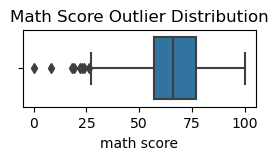

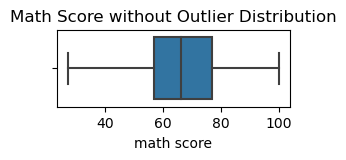

In [134]:
# Before outlier
plt.figure(figsize=(3,1))
sns.boxplot(x="math score", data=dataset)
plt.title("Math Score Outlier Distribution")
# plt.savefig("Math Score Outlier.png")
plt.show()

# After outlier
plt.figure(figsize=(3,1))
sns.boxplot(x="math score", data=new_dataset1)
plt.title("Math Score without Outlier Distribution")
# plt.savefig("Math Score no Outlier.png")
plt.show()

## Reading Score 

In [135]:
q11=dataset["reading score"].quantile(0.25)
q33=dataset["reading score"].quantile(0.75)
print("Reading Score\n",q11,q33)

IQR2=q33-q11
print("IQR: ",IQR2)

lower_limit2=q11-1.5*IQR2
upper_limit2=q33+1.5*IQR2
print("Lower limit: ",lower_limit2 ,"\nUpper limit:", upper_limit2)

Reading Score
 59.0 79.0
IQR:  20.0
Lower limit:  29.0 
Upper limit: 109.0


In [136]:
dataset[(dataset["reading score"]<=lower_limit2) | (dataset["reading score"]>upper_limit2)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,high school,free/reduced,none,0,17,10
76,male,group E,high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
601,female,group C,high school,standard,none,29,29,30
896,male,group B,high school,free/reduced,none,36,29,27
980,female,group B,high school,free/reduced,none,8,24,23


In [137]:
new_dataset2=dataset[(dataset["reading score"]>lower_limit2) & (dataset["reading score"]<upper_limit2)]

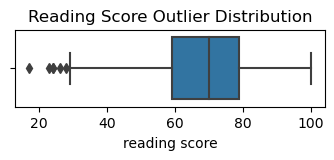

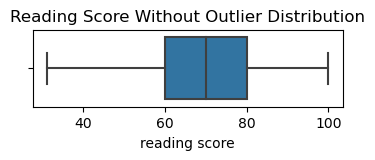

In [138]:
# Before outlier
plt.figure(figsize=(4,1))
sns.boxplot(x="reading score", data=dataset)
plt.title("Reading Score Outlier Distribution")
# plt.savefig("Reading Score Outlier.png")
plt.show()

# After outlier
plt.figure(figsize=(4,1))
sns.boxplot(x="reading score", data=new_dataset2)
plt.title("Reading Score Without Outlier Distribution")
# plt.savefig("Reading Score without Outlier.png")
plt.show()

## Writing score

In [139]:
q111=dataset["writing score"].quantile(0.25)
q333=dataset["writing score"].quantile(0.75)
print("Writing score\n",q111,q333)

IQR3=q333-q111
print("IQR: ",IQR3)

lower_limit3=q111-1.5*IQR3
upper_limit3=q333+1.5*IQR3
print("Lower limit: ",lower_limit3,"\nUpper limit:", upper_limit3)

Writing score
 57.75 79.0
IQR:  21.25
Lower limit:  25.875 
Upper limit: 110.875


In [140]:
dataset[(dataset["writing score"]<lower_limit3) | (dataset["writing score"]>upper_limit3)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,high school,free/reduced,none,0,17,10
76,male,group E,high school,standard,none,30,26,22
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


In [141]:
new_dataset3=dataset[(dataset["writing score"]>=lower_limit3) & (dataset["writing score"]<=upper_limit3)]

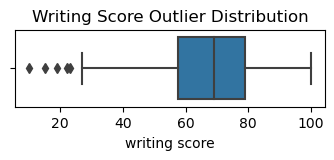

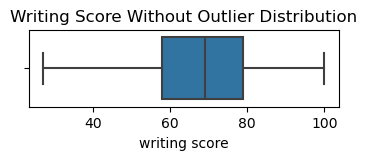

In [142]:
# Before outlier
plt.figure(figsize=(4,1))
sns.boxplot(x="writing score", data=dataset)
plt.title("Writing Score Outlier Distribution")
# plt.savefig("Writing Score Outlier.png")
plt.show()

# After outlier
plt.figure(figsize=(4,1))
sns.boxplot(x="writing score", data=new_dataset3)
plt.title("Writing Score Without Outlier Distribution")
# plt.savefig("Writing Score without Outlier.png")
plt.show()

In [143]:
new_dataset=dataset[(dataset["math score"]>lower_limit) & (dataset["reading score"]>lower_limit2) & (dataset["writing score"]>lower_limit3)]

In [144]:
new_dataset.shape

(984, 8)

In [145]:
new_dataset.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: >

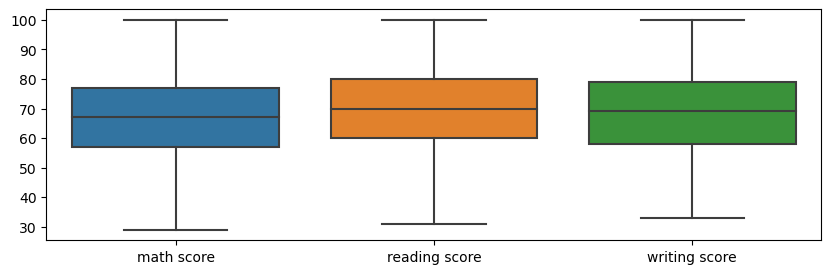

In [146]:
plt.figure(figsize=(10,3))
sns.boxplot(new_dataset)
# plt.savefig("dataset without Outlier.png")

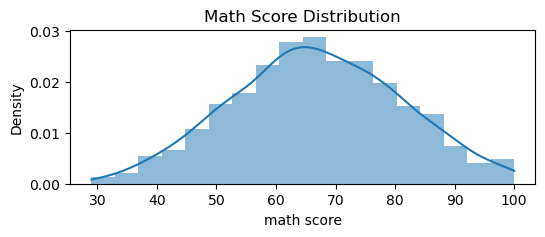

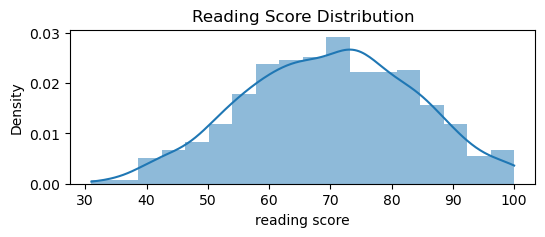

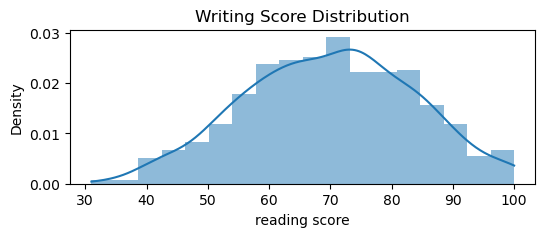

In [147]:
# math score
plt.figure(figsize=(6,2))
sns.histplot(new_dataset["math score"], kde=True, stat="density", linewidth=0)
plt.title('Math Score Distribution')
# plt.savefig("Math Score without Outlier1.png")
plt.show()

# reading score
plt.figure(figsize=(6,2))
sns.histplot(new_dataset['reading score'], kde=True, stat="density", linewidth=0)
plt.title('Reading Score Distribution')
# plt.savefig("Math Score without Outlier2.png")
plt.show()

# writing score
plt.figure(figsize=(6,2))
sns.histplot(new_dataset['reading score'], kde=True, stat="density", linewidth=0)
plt.title('Writing Score Distribution')
# plt.savefig("Math Score without Outlier3.png")
plt.show()

In [153]:
dataset["average score"]=((dataset["math score"]+dataset["writing score"]+dataset["reading score"])/3)

In [154]:
dataset=new_dataset

In [155]:
dataset.shape

(984, 9)

In [156]:
new_dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


# EDA

Text(0.5, 1.0, 'Gender Distribution')

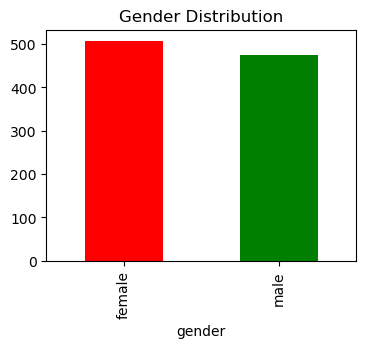

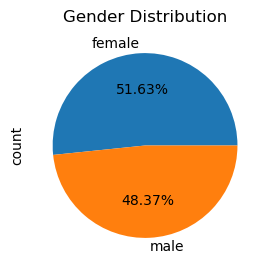

In [157]:
# Gender Bar Chart
plt.figure(figsize=(4,3))
new_dataset["gender"].value_counts().plot(kind="bar",color=["red","green"])
plt.title('Gender Distribution')
# plt.savefig("Gender Distribution Bar Chart.png")

# Gender Pie Chart
plt.figure(figsize=(4,3))
new_dataset["gender"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.title('Gender Distribution')
# plt.savefig("Gender Distribution Pie Chart.png")

Text(0.5, 1.0, 'Race/Ethnicity Distribution')

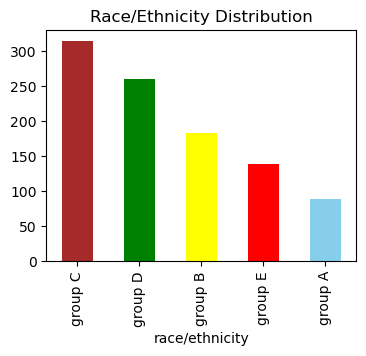

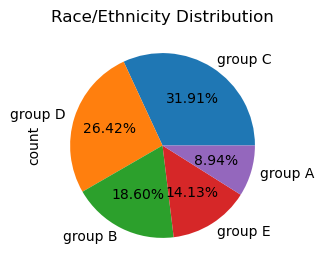

In [158]:
# Race/Ethnicity Bar Chart
plt.figure(figsize=(4,3))
new_dataset["race/ethnicity"].value_counts().plot(kind="bar",color=["brown","green","yellow","red","skyblue"])
plt.title('Race/Ethnicity Distribution')
# plt.savefig("Race Distribution Bar Chart.png")

# Race/Ethnicity Pie Chart
plt.figure(figsize=(4,3))
new_dataset["race/ethnicity"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.title('Race/Ethnicity Distribution')
# plt.savefig("Race Distribution Pie Chart.png")

Text(0.5, 1.0, 'parental level of education Distribution')

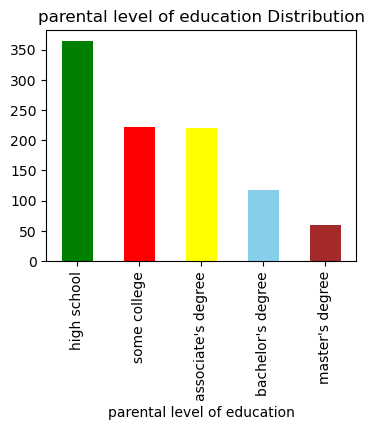

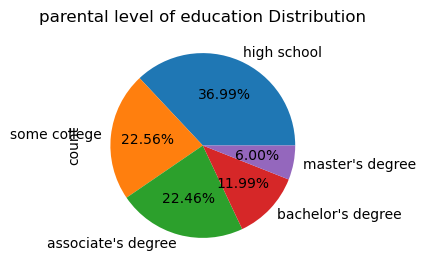

In [159]:
# parental level of education Bar Chart
plt.figure(figsize=(4,3))
dataset["parental level of education"].value_counts().plot(kind="bar",color=["green","red","yellow","skyblue","brown"])
plt.title('parental level of education Distribution')
# plt.savefig("parental level of education Distribution Bar Chart.png")

# Parental level of education Pie Chart
plt.figure(figsize=(6,3))
dataset["parental level of education"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.title('parental level of education Distribution')
# plt.savefig("parental level of education Distribution Pie Chart.png")

Text(0.5, 1.0, 'Test preparation course Distribution')

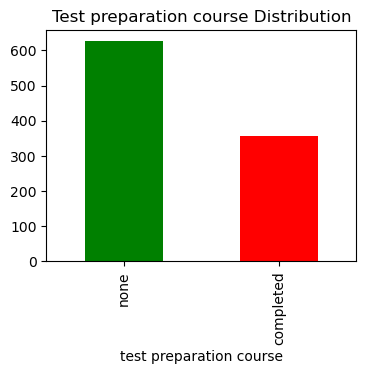

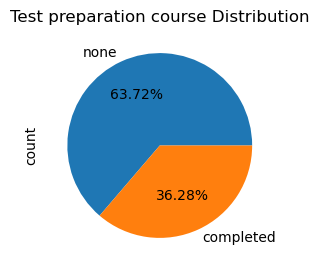

In [160]:
# Test preparation course Bar Chart
plt.figure(figsize=(4,3))
new_dataset["test preparation course"].value_counts().plot(kind="bar", color=["green","red"])
plt.title('Test preparation course Distribution')
# plt.savefig("Test preparation course Distribution Bar.png")

# Test preparation course Pie Chart
plt.figure(figsize=(6,3))
new_dataset["test preparation course"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.title('Test preparation course Distribution')
# plt.savefig("Test preparation course Distribution Pie.png")

Text(0.5, 1.0, 'Lunch Distribution')

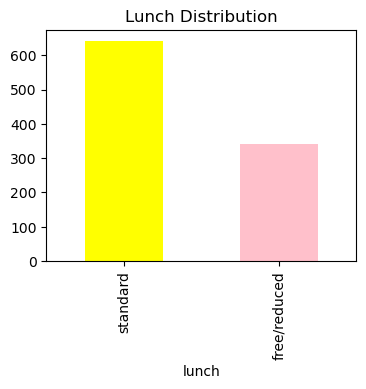

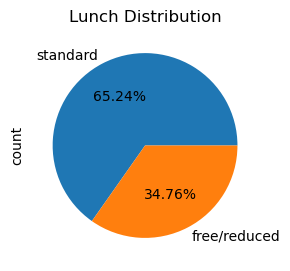

In [161]:
# Lunch Bar Chart
plt.figure(figsize=(4,3))
new_dataset["lunch"].value_counts().plot(kind="bar",color=["yellow","pink"])
plt.title('Lunch Distribution')
# plt.savefig("Lunch Distribution Bar.png")

# Lunch Pie Chart
plt.figure(figsize=(4,3))
new_dataset["lunch"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.title('Lunch Distribution')
# plt.savefig("Lunch Distribution Pie.png")

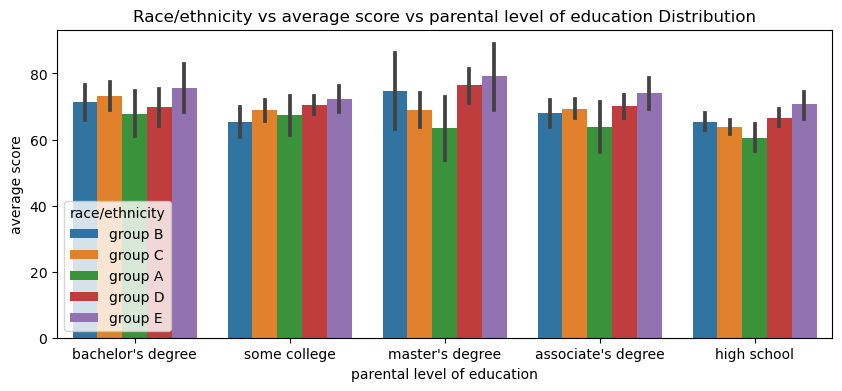

In [162]:
plt.figure(figsize=(10,4))
sns.barplot(x=new_dataset['parental level of education'], y=new_dataset['average score'], data=new_dataset, hue=new_dataset["race/ethnicity"])
plt.title('Race/ethnicity vs average score vs parental level of education Distribution')
# plt.savefig("Race vs average score Distribution.png")
plt.show()

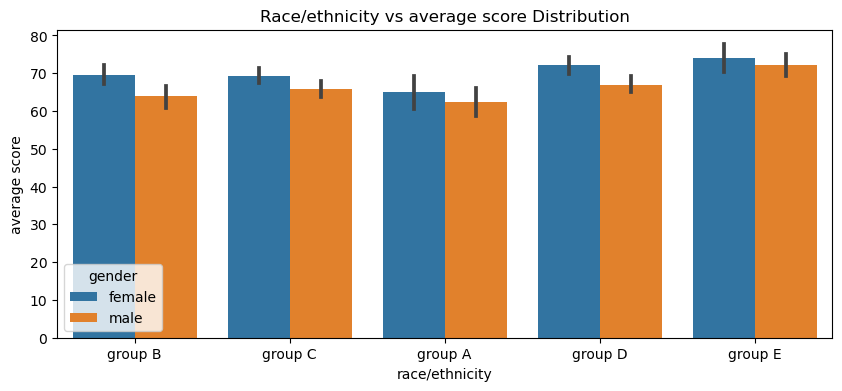

In [163]:
plt.figure(figsize=(10,4))
sns.barplot(x=new_dataset["race/ethnicity"], y=new_dataset["average score"], hue=new_dataset["gender"])
plt.title('Race/ethnicity vs average score Distribution')
# plt.savefig("Racevs average score Distribution.png")
plt.show()

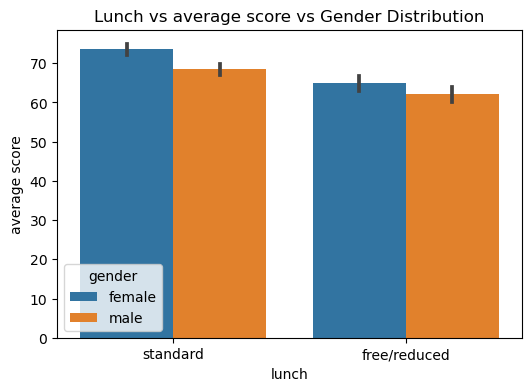

In [164]:
plt.figure(figsize=(6,4))
sns.barplot(x=new_dataset["lunch"], y=new_dataset["average score"], hue=new_dataset["gender"])
plt.title('Lunch vs average score vs Gender Distribution')
# plt.savefig("Lunch vs average score Distribution.png")
plt.show()

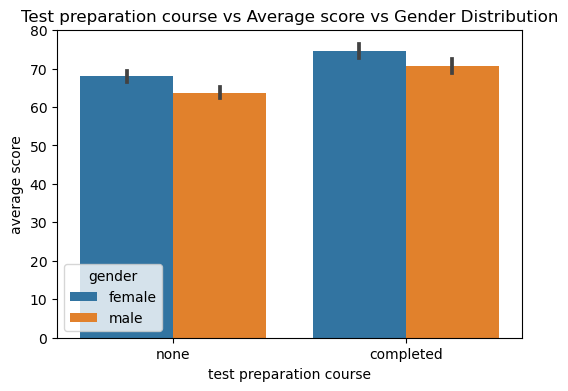

In [165]:
plt.figure(figsize=(6,4))
sns.barplot(x=new_dataset["test preparation course"], y=new_dataset["average score"], hue=new_dataset["gender"])
plt.title('Test preparation course vs Average score vs Gender Distribution')
# plt.savefig("Test preparation course vs average score Distribution.png")
plt.show()

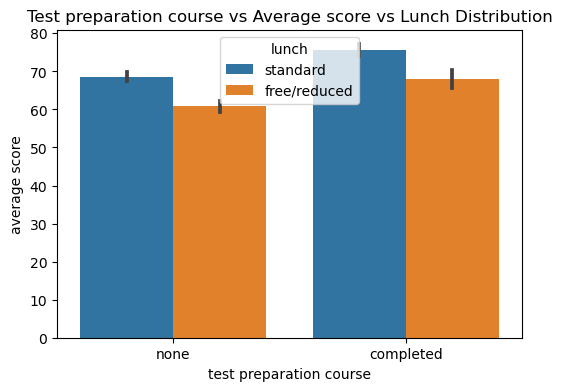

In [166]:
plt.figure(figsize=(6,4))
sns.barplot(x=new_dataset["test preparation course"], y=new_dataset["average score"], hue=new_dataset["lunch"])
plt.title('Test preparation course vs Average score vs Lunch Distribution')
# plt.savefig("Test preparation course vs average score Distribution.png")
plt.show()

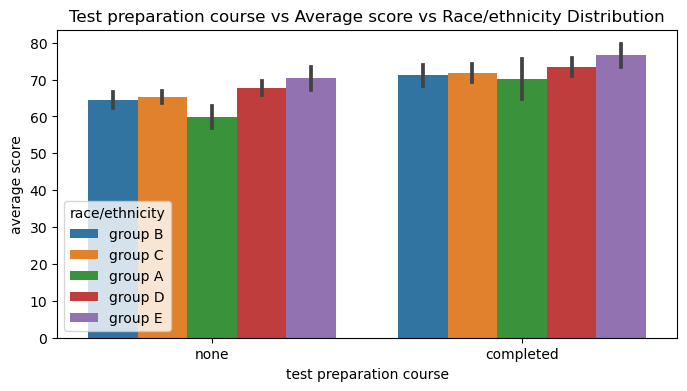

In [167]:
plt.figure(figsize=(8,4))
sns.barplot(x=new_dataset["test preparation course"], y=new_dataset["average score"], hue=new_dataset["race/ethnicity"])
plt.title('Test preparation course vs Average score vs Race/ethnicity Distribution')
# plt.savefig("Test preparation course vs average score vs race Distribution.png")
plt.show()

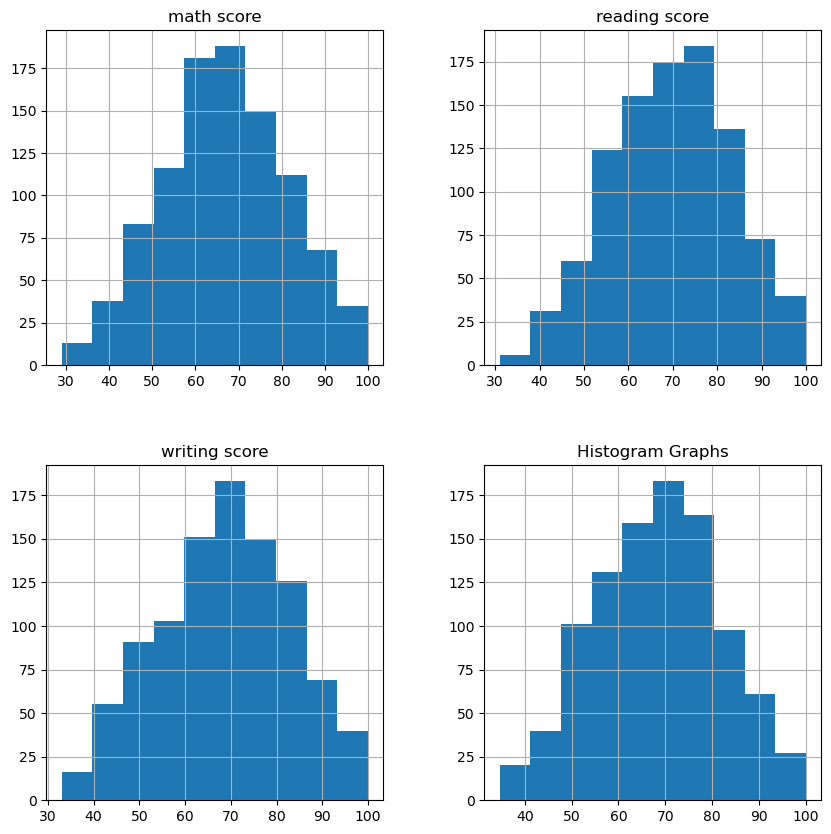

In [168]:
new_dataset.hist(figsize=(10,10))
plt.title('Histogram Graphs')
# plt.savefig("Histogram Graphs Distribution.png")
plt.show()

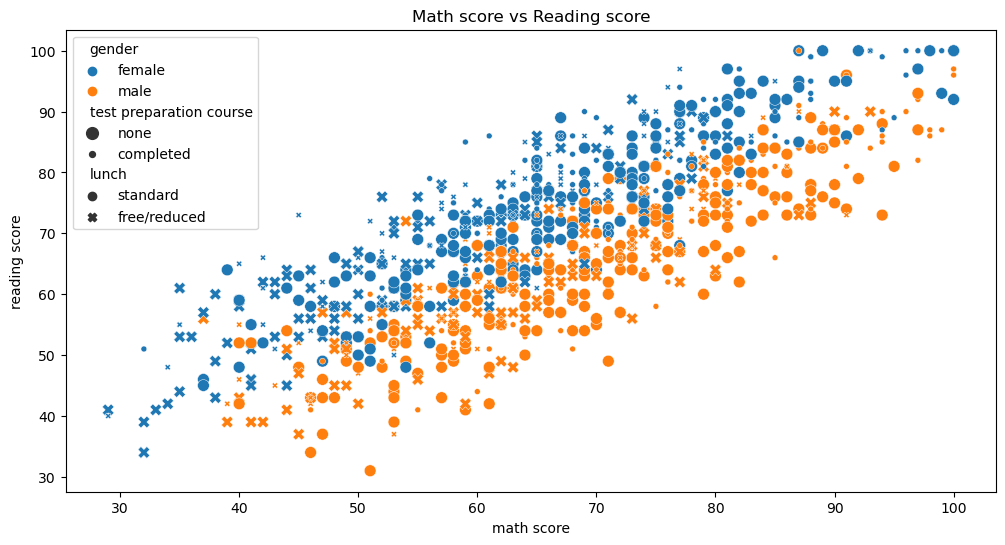

In [169]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=new_dataset["math score"],y=new_dataset["reading score"], hue=new_dataset["gender"], style=new_dataset["lunch"],size=new_dataset["test preparation course"])
plt.title('Math score vs Reading score')
# plt.savefig("Math vs Reading.png")
plt.show()

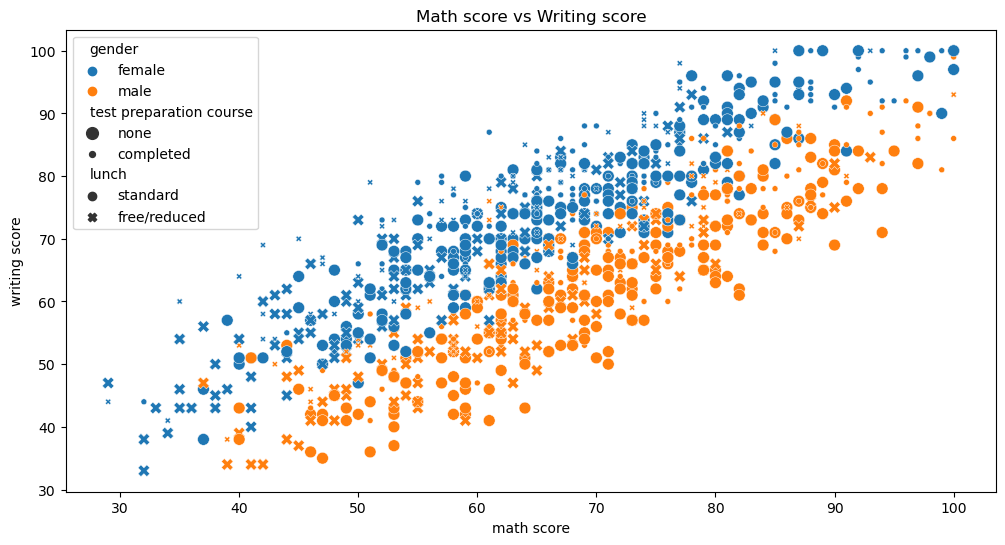

In [170]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=new_dataset["math score"],y=new_dataset["writing score"], hue=new_dataset["gender"], style=new_dataset["lunch"],size=new_dataset["test preparation course"])
plt.title('Math score vs Writing score')
# plt.savefig("Math score vs Writing .png")
plt.show()

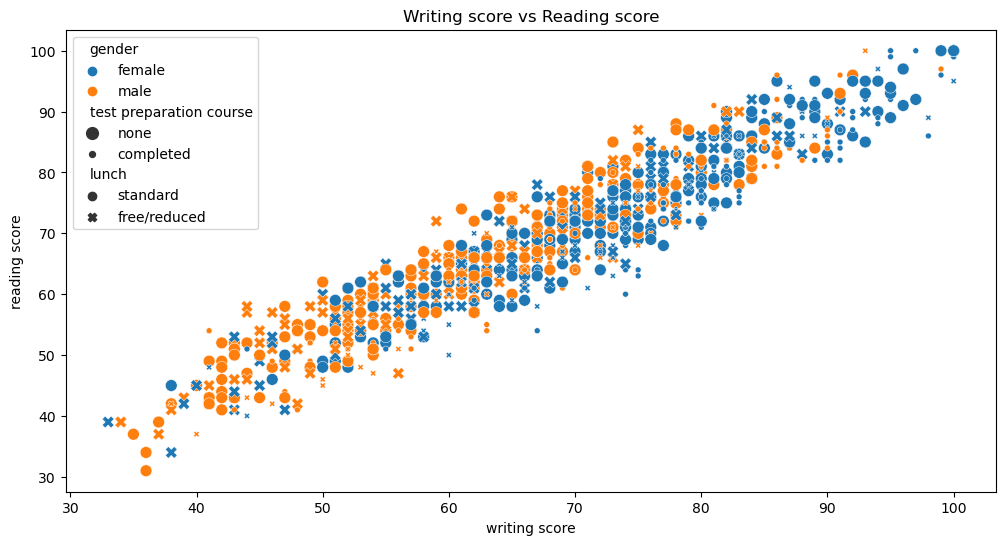

In [171]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=new_dataset["writing score"],y=new_dataset["reading score"], hue=new_dataset["gender"], style=new_dataset["lunch"],size=new_dataset["test preparation course"])
plt.title('Writing score vs Reading score')
# plt.savefig("writing score vs Reading score.png")
plt.show()

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


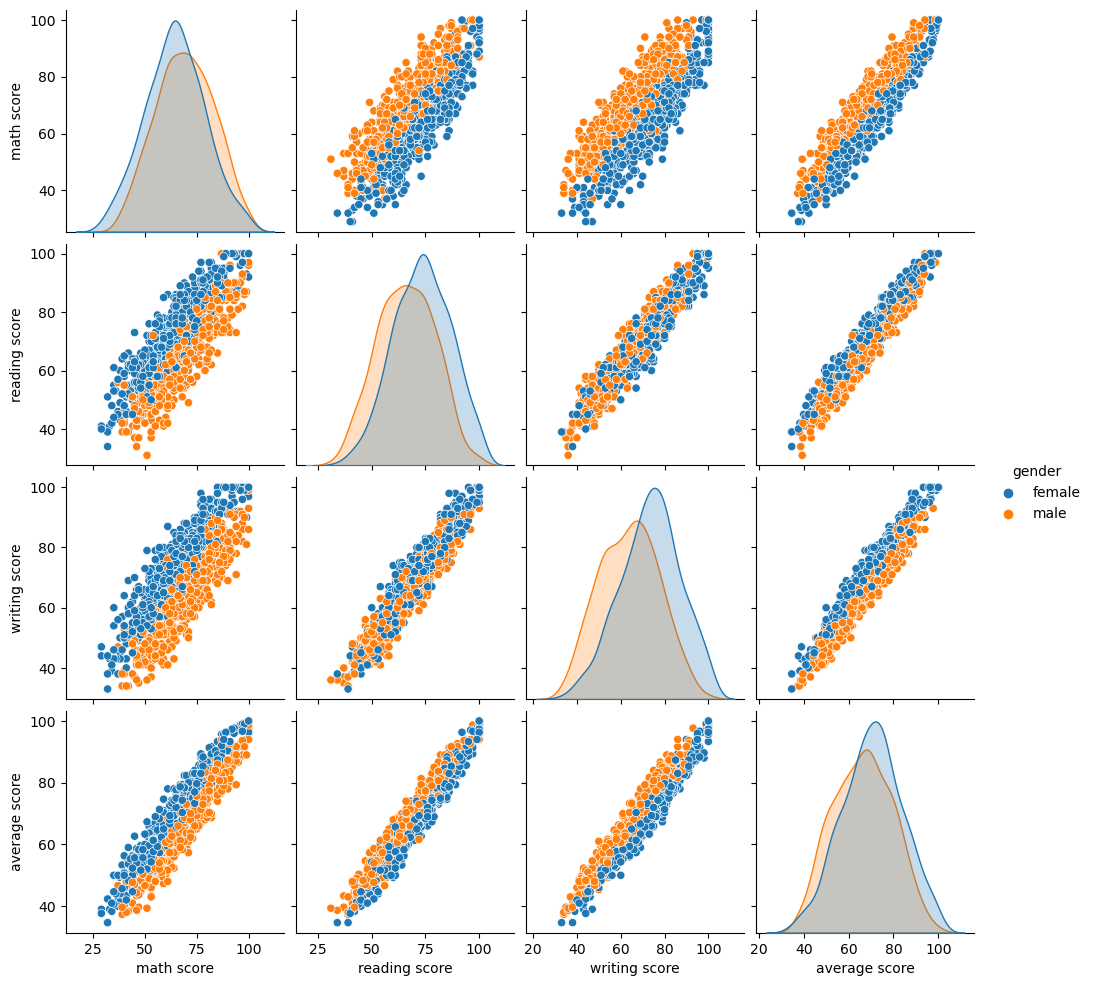

In [172]:
sns.pairplot(new_dataset,hue="gender")
# plt.savefig("Pairplots.png")
plt.show()

## Encoding

In [173]:
# gender

gl=LabelEncoder()
new_dataset["gender"]=gl.fit_transform(new_dataset["gender"])
# Female = 0, male = 1

new_dataset["gender"].unique()

array([0, 1])

In [174]:
# race/ethnicity
rl=LabelEncoder()
new_dataset["race/ethnicity"]=rl.fit_transform(new_dataset["race/ethnicity"])
# group A = 0, group B = 1, group C = 2, group D = 3,  group E = 4

new_dataset["race/ethnicity"].unique()

array([1, 2, 0, 3, 4])

In [175]:
# parental level of education
edul=LabelEncoder()
new_dataset["parental level of education"]=edul.fit_transform(new_dataset["parental level of education"])
# associate's degree = 0, bachelor's degree = 1, high school = 2, master's degree = 3, some college = 4

new_dataset["parental level of education"].unique()

array([1, 4, 3, 0, 2])

In [176]:
# test preparation course
testl=LabelEncoder()
new_dataset["test preparation course"]=testl.fit_transform(new_dataset["test preparation course"])
# completed = 0, none = 1

new_dataset["test preparation course"].unique()

array([1, 0])

In [177]:
# lunch
lunchl=LabelEncoder()
new_dataset["lunch"]=lunchl.fit_transform(new_dataset["lunch"])
# free/reduced = 0 , standard = 1

new_dataset["lunch"].unique()

array([1, 0])

In [178]:
new_dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333


In [179]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       984 non-null    int32  
 1   race/ethnicity               984 non-null    int32  
 2   parental level of education  984 non-null    int32  
 3   lunch                        984 non-null    int32  
 4   test preparation course      984 non-null    int32  
 5   math score                   984 non-null    int64  
 6   reading score                984 non-null    int64  
 7   writing score                984 non-null    int64  
 8   average score                984 non-null    float64
dtypes: float64(1), int32(5), int64(3)
memory usage: 57.7 KB


In [180]:
new_dataset["gender"]=dataset["gender"].astype("int64")
new_dataset["race/ethnicity"]=dataset["race/ethnicity"].astype("int64")
new_dataset["parental level of education"]=dataset["parental level of education"].astype("int64")
new_dataset["lunch"]=dataset["lunch"].astype("int64")
new_dataset["test preparation course"]=dataset["test preparation course"].astype("int64")

In [181]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       984 non-null    int64  
 1   race/ethnicity               984 non-null    int64  
 2   parental level of education  984 non-null    int64  
 3   lunch                        984 non-null    int64  
 4   test preparation course      984 non-null    int64  
 5   math score                   984 non-null    int64  
 6   reading score                984 non-null    int64  
 7   writing score                984 non-null    int64  
 8   average score                984 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 76.9 KB


# Scaling 

In [183]:
scalling=StandardScaler()
new_dataset=pd.DataFrame(scalling.fit_transform(new_dataset),columns=new_dataset.columns)

In [184]:
new_dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,-0.967992,-1.021062,-0.669953,0.729870,0.754571,0.367004,0.159451,0.368070,0.317036
1,-0.967992,-0.157154,1.463490,0.729870,-1.325256,0.156268,1.461525,1.343734,1.040387
2,-0.967992,-1.021062,0.752342,0.729870,0.754571,1.631422,1.823213,1.692186,1.813624
3,1.033067,-1.884971,-1.381101,-1.370107,0.754571,-1.389132,-0.925611,-1.722640,-1.428982
4,1.033067,-0.157154,1.463490,0.729870,0.754571,0.647986,0.593476,0.437760,0.591411


In [185]:
new_dataset.drop(["average score"], axis=1, inplace=True)

In [186]:
new_dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,-0.967992,-1.021062,-0.669953,0.729870,0.754571,0.367004,0.159451,0.368070
1,-0.967992,-0.157154,1.463490,0.729870,-1.325256,0.156268,1.461525,1.343734
2,-0.967992,-1.021062,0.752342,0.729870,0.754571,1.631422,1.823213,1.692186
3,1.033067,-1.884971,-1.381101,-1.370107,0.754571,-1.389132,-0.925611,-1.722640
4,1.033067,-0.157154,1.463490,0.729870,0.754571,0.647986,0.593476,0.437760


# Traning and Testing Split

In [187]:
input_c=new_dataset.drop(["math score"], axis=1)
output_c=new_dataset[["math score"]] 
input_c, output_c

(       gender  race/ethnicity  parental level of education     lunch  \
 0   -0.967992       -1.021062                    -0.669953  0.729870   
 1   -0.967992       -0.157154                     1.463490  0.729870   
 2   -0.967992       -1.021062                     0.752342  0.729870   
 3    1.033067       -1.884971                    -1.381101 -1.370107   
 4    1.033067       -0.157154                     1.463490  0.729870   
 ..        ...             ...                          ...       ...   
 979 -0.967992        1.570663                     0.752342  0.729870   
 980  1.033067       -0.157154                     0.041195 -1.370107   
 981 -0.967992       -0.157154                     0.041195 -1.370107   
 982 -0.967992        0.706754                     1.463490  0.729870   
 983 -0.967992        0.706754                     1.463490 -1.370107   
 
      test preparation course  reading score  writing score  
 0                   0.754571       0.159451       0.368070 

In [188]:
xtrain, xtest, ytrain, ytest = train_test_split(input_c, output_c, test_size=0.2, random_state=42)

In [189]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((787, 7), (197, 7), (787, 1), (197, 1))

In [190]:
xtrain.head(), xtest.head(), ytrain.head(), ytest.head()

(       gender  race/ethnicity  parental level of education     lunch  \
 962  1.033067       -0.157154                    -1.381101  0.729870   
 762  1.033067       -1.021062                     1.463490  0.729870   
 334 -0.967992       -1.021062                     0.041195  0.729870   
 889 -0.967992        0.706754                     0.041195 -1.370107   
 529  1.033067       -1.884971                    -1.381101  0.729870   
 
      test preparation course  reading score  writing score  
 962                 0.754571      -0.346911      -0.746975  
 762                 0.754571      -0.346911      -0.607595  
 334                -1.325256       0.448801       0.368070  
 889                 0.754571       1.027501       1.064973  
 529                -1.325256       1.606200       1.204354  ,
        gender  race/ethnicity  parental level of education     lunch  \
 613  1.033067        0.706754                     1.463490  0.729870   
 451  1.033067       -0.157154           

# Linear Regresion Model

In [191]:
model=LinearRegression()

# Model training 
model.fit(xtrain, ytrain)

LinearRegression()

In [192]:
# Mean Squared Error
mse= cross_val_score(model, xtrain, ytrain, scoring="neg_mean_squared_error", cv=5)
mse=np.mean(mse)
mse

-0.15301639218201707

In [193]:
# Mean Absolute Error
mae= cross_val_score(model, xtrain, ytrain, scoring="neg_mean_absolute_error", cv=5)
mae=np.mean(mae)
mae

-0.31218845616984686

In [194]:
prediction1=model.predict(xtest)
prediction1

array([[ 2.4138702 ],
       [-0.49869894],
       [-0.30159837],
       [-0.04593875],
       [-0.81606739],
       [ 0.47372456],
       [ 0.79049198],
       [ 0.49434337],
       [-0.16172096],
       [-1.3520945 ],
       [ 1.14744243],
       [ 0.62023101],
       [ 0.25374293],
       [ 0.13512236],
       [ 0.79159336],
       [-0.51350342],
       [-0.05036057],
       [-0.97878933],
       [-0.20969563],
       [-0.56923481],
       [-1.03958266],
       [-0.92941041],
       [ 1.46928087],
       [-0.52451365],
       [-0.40383391],
       [-1.49118042],
       [ 0.42242277],
       [ 0.91975684],
       [-0.23815417],
       [ 0.21783219],
       [ 0.94730767],
       [-1.94223313],
       [-0.41346523],
       [-0.80667574],
       [-1.79110636],
       [-0.42527203],
       [-0.60228306],
       [ 0.70242451],
       [-0.74823676],
       [-0.18744779],
       [-1.34996061],
       [-0.30033897],
       [-0.69260984],
       [ 0.70804378],
       [ 1.03609699],
       [-0

In [195]:
score1 = r2_score(ytest, prediction1)
print("R-squared:", score1)

R-squared: 0.8353704528480907


In [196]:
# sns.displot(ytest-prediction1, kind="kde")
# plt.savefig("Accuray.png")

# Support Vector Regression Model

In [197]:
model2 = SVR()

# Training Model
model2.fit(xtrain, ytrain)

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [198]:
# Prediction Model
prediction2 = model2.predict(xtest)
prediction2

array([ 1.75751607, -0.61829079, -0.61947982, -0.26146445, -0.83456691,
        0.7368622 ,  0.81399888,  0.08000757, -0.06069118, -1.47840997,
        1.23580826,  0.72058163,  0.23502961,  0.17392839,  0.49948304,
       -0.60421238,  0.17355315, -1.12688368, -0.17205318, -0.68473456,
       -0.72787828, -0.98388326,  1.37865914, -0.41313165, -0.32591542,
       -1.50534977,  0.41211337,  0.89290581, -0.1125173 , -0.12370398,
        0.84137346, -1.44495972, -0.49610281, -0.57761049, -1.63031048,
       -0.34668626, -0.73681754,  0.46905087, -0.85289118, -0.27527014,
       -1.27568424, -0.2829578 , -0.75071775,  0.79496848,  1.13832232,
       -0.54356723,  0.16846994,  1.0106457 ,  1.42416809,  1.41453929,
       -0.49872852,  0.47698414, -0.70518607,  0.88205438,  0.4993124 ,
        0.1481346 ,  0.19347459,  0.94112613, -1.51517152,  1.47691075,
       -0.14811492, -0.62379748, -1.1118789 , -0.57081252,  0.08068531,
       -0.20124563, -0.06584959, -1.67835166,  1.62418054, -0.10

In [199]:
# Mean Absolute Error
mse2 = mean_squared_error(ytest, prediction2)
# Mean Absolute Error
mae2= mean_absolute_error(ytest, prediction2)
# R2 Score
score2 = r2_score(ytest, prediction2)

print("Mean Squared Error:", mse2)
print("Mean Absolute Error:", mae2)
print("R-squared:", score2)

Mean Squared Error: 0.17737069698128735
Mean Absolute Error: 0.3389700407236057
R-squared: 0.8171258826502885


# Decision Tree Regression Model

In [200]:
model3 = DecisionTreeRegressor()

# Training Model
model3.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [201]:
# Mean Squared Error
mse3= cross_val_score(model3, xtrain, ytrain, scoring="neg_mean_squared_error", cv=5)
mse3=np.mean(mse3)
mse3

-0.32417386585339225

In [202]:
# Mean Absolute Error
mae3= cross_val_score(model3, xtrain, ytrain, scoring="neg_mean_absolute_error", cv=5)
mae3=np.mean(mae3)
mae3

-0.46143698512509346

In [203]:
# Prediction Model
prediction3 = model3.predict(xtest)
prediction3

array([ 1.70166763, -0.33545061, -0.61643244, -0.12471424, -1.59986883,
        0.08602213,  1.49093126, -0.33545061,  0.43724941, -1.52962338,
        1.20994944,  0.2967585 , -0.05446878, -0.12471424,  0.15626759,
       -0.68667789, -0.26520515, -0.96765972, -0.47594152, -0.1949597 ,
       -0.47594152, -1.45937792,  1.42068581, -0.1949597 ,  0.08602213,
       -1.38913246,  0.2967585 ,  0.22651304,  0.08602213,  0.57774033,
        0.57774033, -1.59986883, -0.68667789, -0.96765972, -1.74035975,
        0.2967585 , -0.26520515,  0.50749487, -1.10815063, -0.12471424,
       -1.67011429, -0.1949597 , -0.89741426,  0.71823124,  0.85872215,
       -0.40569607,  0.22651304,  0.7884767 ,  0.99921307,  1.35044035,
        0.15626759,  0.85872215, -0.68667789,  1.63142218,  0.7884767 ,
        0.15626759,  0.50749487,  0.92896761, -2.09158703,  1.912404  ,
       -0.40569607, -0.82716881, -0.40569607, -1.03790518, -0.12471424,
       -0.33545061, -0.26520515, -1.17839609,  1.56117672, -0.40

In [204]:
# R2 Score
score3 = r2_score(ytest, prediction3)
print("R-squared:", score3)

R-squared: 0.6804412328784721


In [205]:
print("\t *Mean Squared Error*")
print("Linear Regresion Model")
print("Mean Squared Error:", mse)

print("\nSupport Vector Regression Model")
print("Mean Squared Error:", mse2)

print("\nDecision Tree Regression Model")
print("Mean Squared Error:", mse3)

	 *Mean Squared Error*
Linear Regresion Model
Mean Squared Error: -0.15301639218201707

Support Vector Regression Model
Mean Squared Error: 0.17737069698128735

Decision Tree Regression Model
Mean Squared Error: -0.32417386585339225


In [206]:
print("\t *Mean Absolute Erro*")
print("Linear Regresion Model")
print("Mean Absolute Error:", mae)

print("\nSupport Vector Regression Model")
print("Mean Absolute Error:", mae2)

print("\nDecision Tree Regression Model")
print("Mean Absolute Error:", mae3)

	 *Mean Absolute Erro*
Linear Regresion Model
Mean Absolute Error: -0.31218845616984686

Support Vector Regression Model
Mean Absolute Error: 0.3389700407236057

Decision Tree Regression Model
Mean Absolute Error: -0.46143698512509346


In [207]:
print("\t *R-squared*")
print("Linear Regresion Model")
print("R-squared:", score1)

print("\nSupport Vector Regression Model")
print("R-squared:", score2)

print("\nDecision Tree Regression Model")
print("R-squared:", score3)

	 *R-squared*
Linear Regresion Model
R-squared: 0.8353704528480907

Support Vector Regression Model
R-squared: 0.8171258826502885

Decision Tree Regression Model
R-squared: 0.6804412328784721


In [208]:
# Best Prediction Model
if score1 > score2:
    print("Linear Regresion Model is best model")
    print("Score:", score1)
    print("Persontage score:", score1*100, "%")
elif score2 > score3:
    print("Support Vector Regression Model is best model")
    print("Score:", score2)
    print("Persontage score:", score2*100, "%")
else:
    print("Decision Tree Regression Model is best model")
    print("Score:", score3)
    print("Persontage score:", score3*100, "%")
    
# Worst Prediction Model
if score1 < score2:
    print("\nLinear Regresion Model is Worst model")
    print("Score:", score1)
    print("Persontage score:", score1*100, "%")
elif score2 < score3:
    print("\nSupport Vector Regression Model is Worst model")
    print("Score:", score2)
    print("Persontage score:", score2*100, "%")
else:
    print("\nDecision Tree Regression Model is Worst model")
    print("Score:", score3)
    print("Persontage score:", score3*100, "%")

Linear Regresion Model is best model
Score: 0.8353704528480907
Persontage score: 83.53704528480907 %

Decision Tree Regression Model is Worst model
Score: 0.6804412328784721
Persontage score: 68.04412328784721 %
